# Tarea 3

* Sofía Cruz T. (**@cutsof**)
* Daniel Martínez U. (**@danmarurr**)

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


Quisimos hacer una animación para ver cḿoo se va llenando la parábola con los puntos. Así que primero usamos `PyPlot` y `matplotlib.animation`, con ayuda de código para animar :) . 

In [ ]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim  

In [ ]:
"""
`sqr_mapeos` calcula el mapeo de F(x)=x^2 -2 en el intervalo [-2,2] a partir de una semilla `x`
, haciendo `n` iteraciones. Regresa dos vectores, `xpath` y `ypath`, los cuales, juntos indican las 
coordenadas del punto resultante después de cada iteración.
"""
function sqr_mapeos(x::Float64,n::Int)
    xpath = Float64[]
    ypath = Float64[]
    for i in 1:n
        push!(xpath,x)      #valor n-1 va a x
        x = x^2 -2          #se realiza F(x)
        push!(ypath,x)      #valor n va a y
        
    end
    return xpath,ypath
    
end

In [ ]:
"""
`anima_plot` Resliza la animación de cómo se desenvuelven las coordenadas obtenidas por el mapeo.
"""
function anima_plot(x,y, nombre::ASCIIString)
    fig = figure(figsize=(4,4))
    cuadros = [[plot(x[1:i],y[1:i],".",color="b")] for i=1:5:length(y)]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

"""
`muestra_animacion` muestra la animación creada en `anima_plot`
"""
function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

In [ ]:
#Se obtienen los mapeos de 500 iteraciones para las semillas 0.0,0.1 y 0.001
x0,y0=sqr_mapeos(0.0,500)
x01,y01=sqr_mapeos(0.1,500)
x0001,y0001=sqr_mapeos(0.001,500);

In [ ]:
#Se corren las animaciones para cada una
anima_plot(x0,y0,"parabola_0.0") 
anima_plot(x01,y01,"parabola_0.1")
anima_plot(x0001,y0001,"parabola_0.001")
muestra_animacion("parabola_0.0")
muestra_animacion("parabola_0.1")
muestra_animacion("parabola_0.001")

### Observaciones

* Si $x_0 = 0$ es claro que obtenemos una órbita eventualmente periódica, pues $x_1 = -2$, $x_n = 2$ $\forall j \geq 2$.

* Sin embargo, para valores muy cercanos a cero, el comportamiento no es para nada cercano al de una órbita eventualmente periódica, de hecho, con las animaciones nos damos cuentas que las iteraciones logran cubrir todas las evaluaciones del mapeo en $[-2, 2]$, esto habla de la "inestabilidad" del cero, pues sus vecinos no intentan seguir su comportamiento.

**Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

Ahora vamos a estar trabajando con `Plots` así qúe limpiamos el área de trabajo.

In [ ]:
workspace()

In [1]:
using Plots, PlotRecipes
using LaTeXStrings
pyplot()

    +(AbstractArray, DataArrays.DataArray) at /home/daniel/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/daniel/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home/daniel/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/daniel/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Plots.PyPlotBackend()

Creamos la función genral de mapeos que recibe cualquier función y regresa dos vectores, que juntos marcan el trayecto 
de la iteración.

In [2]:
"""
`Fmapeos` calcula los primeros n términos de la órbita del valor `x` bajo `F`, regresando dos arreglos: `xpath` 
y `ypath` que pueden ser empleados en la graficación vista en clase para llevar a cabo un análisis.Ç
"""
function Fmapeos(F::Function,x::Float64,n::Int)
    xpath=Float64[x]
    ypath=Float64[0.0]
    for i in 1:n
        push!(xpath,x)     
        x = F(x)
        push!(ypath,x)     #Hasta acá es la misma función que sqrt_mapeos
        
        push!(xpath,x)     #Se agregan estas dos líneas para que entre cada punto sobre la gráfica, 
                           #haya un punto sobre la identidad
        push!(ypath,x)
    end
    return xpath,ypath
end

Fmapeos (generic function with 1 method)

In [33]:
#Agreguemos una función que grafique las iteraciones para realizar el análisis gráfico
"""
`Fmapeo_graph` mapea en una gráfica con límites en el eje `x` (`ranx`[1], `ranx`[2]) y límites en el eje `y` 
(`rany[1]`, `rany[2]`) los primeros `n` términos de la órbita de `seed` bajo `F`, mostrando las proyecciones de
dichos términos con la función identidad.
"""
function Fmapeo_graph(F::Function, seed::Float64, ranx::Array{Float64,1}, rany::Array{Float64,1}, n = 100)
    rangoxi, rangoxf = ranx
    rangoyi, rangoyf = ranx
    x0,y0=Fmapeos(F, seed, n) #Se oprea Fmapeos y se guardan los vectores de salida

    rangox = rangoxi:1/32:rangoxf   #Se especifica el rango para graficar
    
    plot(rangox, F,           #Se grafica a F(x)
    xlabel=L"x", xlim = (rangoxi,rangoxf), ylim=(rangoyi, rangoyf), ylabel = L"F(x)", 
    legend=false, title=L"$F(x)= F(x)$", grid=false) #El título va ligado a F(x) 
    
    plot!(rangox, x->x, color=:red) #Se grafica la identidad

    plot!(x0, y0, #Se grafican los vectores
    line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

end

#Implementamos una función que calcula los primeros n términos de la orbita de un punto dado bajo una función f
"""
`orbita` calcula los primeros `n` puntos de la órbita de `x` bajo `F`

## Argumentos:

* `F::Function`: Regla de correspondencia
* `n::Int`: Número de iteraciones
* `x::Float64`: punto del cual quiere calcularse la órbita

"""
function orbita(F::Function, x::Float64, n::Int)
    @assert n >= 1 "Por lo menos debe hacerse una iteración"
    
    orbita = Float64[x]
    for i in 1:n
        xold = orbita[end]
        xnew = F(xold)
        #@show xold, xnew
        orbita = push!(orbita, xnew)
    end
    return orbita
end


orbita (generic function with 1 method)

Se usa la función $\sqrt x$ con semilla `0.5`

[Plots.jl] Initializing backend: pyplot



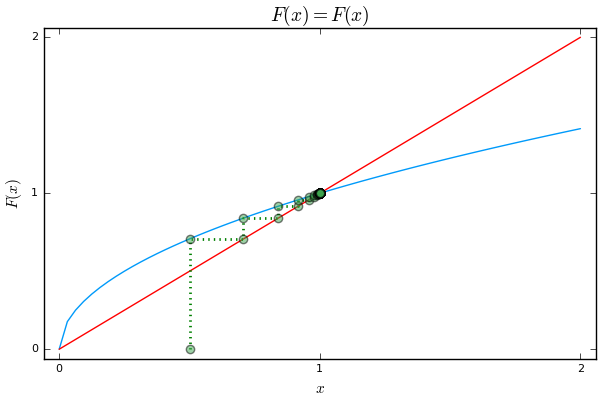

In [4]:
ranx1 = Float64[0,2]
rany1 = Float64[0,3]
Fmapeo_graph(sqrt, 0.5, ranx1, rany1)

Podemos observar cómo $x=1$ es un punto al cual las iteraciones convergen. Y como 1 es un punto fijo, estamos tentados a decir que es un punto atractor (esto, sin saber el criterio de la derivada el cual indica que $F'(1) = 0.5 <1 \therefore$ 1 es atractor). 


**Ejercicio 3:** 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 


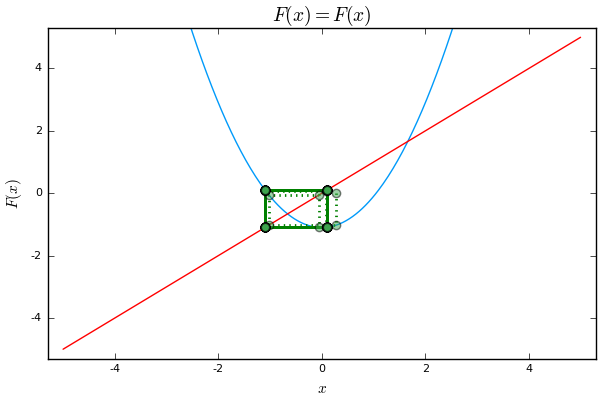

In [18]:
seed = -1.1 + 2.2*rand() #Una semilla aleatoria en el intervalo [-1.1,1.1]
ranx2 = Float64[-5,5]
rany2 = Float64[-3,3]
Fmapeo_graph(x->(x^2-1.1), seed, ranx2, rany2) 


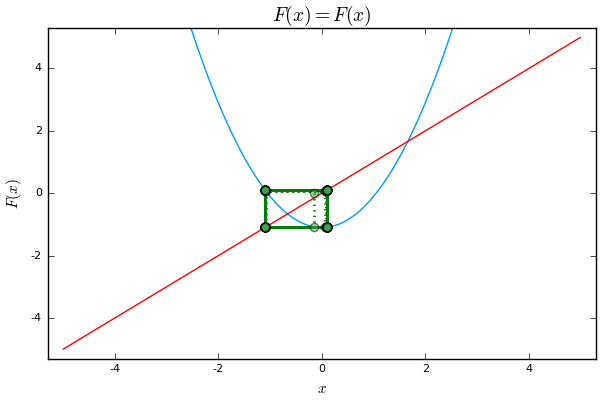

In [19]:
#Un segundo intento
seed = -1.1 + 2.2*rand() #Una semilla aleatoria en el intervalo [-1.1,1.1]
ranx2 = Float64[-5,5]
rany2 = Float64[-3,3]
Fmapeo_graph(x->(x^2-1.1), seed, ranx2, rany2) 

Vemos que con cualquier semilla $x_{\text{seed}} \in [-1.1, 1.1]$, se cae en un ir y venir, una órbita, entre dos valores. Tiene forma cuadrada en la gráfica ya que entre cada valor se incluye el punto de éste sobre la identidad. Ya que esto es determinista, agarramos la misma semilla que se usó para la gráfica y observamos los últimos valores de cualquiera de los dos vectores, en este caso, de x.

In [43]:
x0 = orbita(x-> (x^2 - 1.1), -1.1 + 2.2*rand(), 1000)
x0[end-4:end] 

5-element Array{Float64,1}:
  0.091608
 -1.09161 
  0.091608
 -1.09161 
  0.091608

Vemos que los valores repetidos son `-1.0916079783099617` y `0.0916079783099617`

De esto concluimos que las órbitas de cualquier punto en $[-1.1, 1.1]$ es eventualmente periódica, pues todas al final todas se dirigen a la órbita de periodo 2 $O_{2}(x,f) = \{-1.0916079783099617, 0.0916079783099617\}$

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

Definimos las funciones que tenemos que analizar

In [47]:
F1(x) = 1/(3x)
F2(x) = -(x^5)/5
F3(x) = x/2 -2

F3 (generic function with 1 method)

Graficamos como en el problema anterior. Se incluyen trayectos adicionales con otras semillas para mostrar mejor el comportamiento de las órbitas.


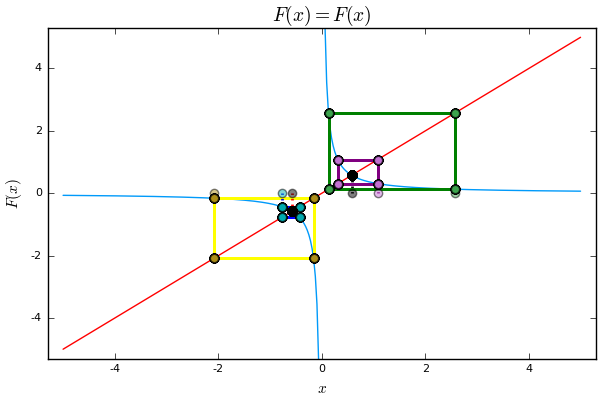

In [54]:
# Probemos con la función F1
ranx2 = Float64[-5,5]
rany2 = Float64[-3,3]
Fmapeo_graph(F1,sqrt(1/3)+2,ranx2, rany2) 

x0,y0=Fmapeos(x->F1(x),sqrt(1/3)+0.5,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F1(x),-sqrt(1/3)-1.5,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F1(x),-sqrt(1/3)-0.2,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F1(x),sqrt(1/3),100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))
x4,y4=Fmapeos(x->F1(x),-sqrt(1/3),100)
plot!(x4, y4, 
line=(:red, :path, 2.0, :dot), marker=(:black,:point, 0.5))

In [55]:
1/sqrt(3)

0.5773502691896258

Vemos cómo donde sea que se coloque la semilla, se generarán órbitas de periodo 2. Esto se debe a la simetría de la función con respecto a la identidad. También observamos que si las semillas cumplen con que $|x_{\text{seed}}|\sim 1/\sqrt{3}$ las órbitas se acercan mucho a los puntos fijos de la funcion $F_1(x)$ dados por $x=\pm\frac{1}{\sqrt3}$, concluyendo que éstos puntos son neutros.

Vemos como en las siguientes dos funciones se conserva que las raíces son puntos fijos de la iteración.


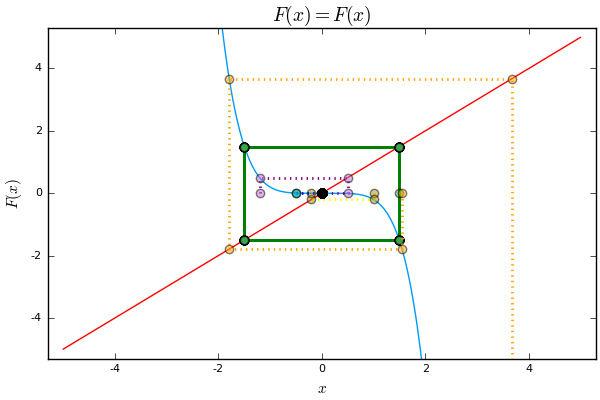

In [57]:
Fmapeo_graph(F2,sqrt(sqrt(5)),ranx2, rany2)

x0,y0=Fmapeos(F2,-1.2,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F2,1.0,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F2,-0.5,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F2,1.55,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x4,y4=Fmapeos(F2,0.0,100)
plot!(x4, y4, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Acá las órbitas se encuentran en las raíces de $F_2(x)$ que no son intersectadas por la identidad. Fuera de la órbita las semillas divergen, y dentro, convergen a 0. 

In [ ]:
Fmapeo_graph(x->F3(x),-4.0+4,-9.0,1.0,-7.0,-1.0)

x0,y0=Fmapeos(x->F3(x),-4.0-3,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F3(x),-4.0+2,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F3(x),-4.0-1,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F3(x),-4.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Acá no hay órbitas, y vemos cómo de ambos lados del punto fijo, habrá atracción. Además de que esta atracción no está limitada en rango como en la función anterior.

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?


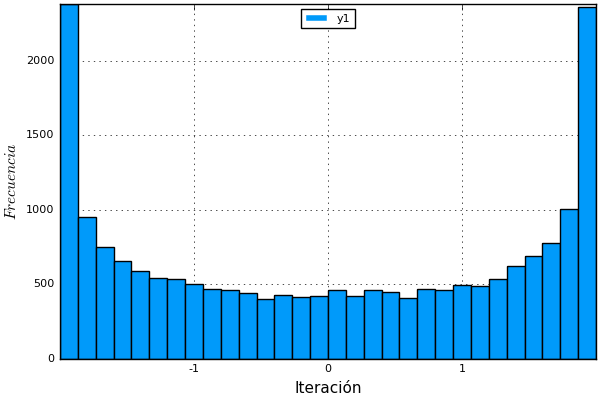

In [58]:
#Como queremos un número aleatorio en el intervalo [-2,2]
random1 = -2 + 4*rand()

orb1 = orbita(x -> (x^2 - 2), random1, 20000);
histogram(orb1, xlabel ="Iteración", ylabel=L"Frecuencia")

Es evidente que hay **Muchas** iteraciones cercanas a -2 y 2, como $F'(2) = 4 > 1$ sabemos que 2 es un punto fijo repulsor, ahora bien, si una iteración $x_j\sim$2, entonces $x_{j + 1}\sim 0$ por lo que $x_{j + 2}\sim -2$ y así sucesivamente, por lo que parece que una vez cayendo en valores cercanos de -2, 0 y 2 (pero no tan cercanos como para que ocurra la situación del ejercicio 1) se generan órbitas de periodo 3.

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

In [59]:
F4(x) = x^2
F5(x) = x^3
F6(x) = -x^3

F6 (generic function with 1 method)


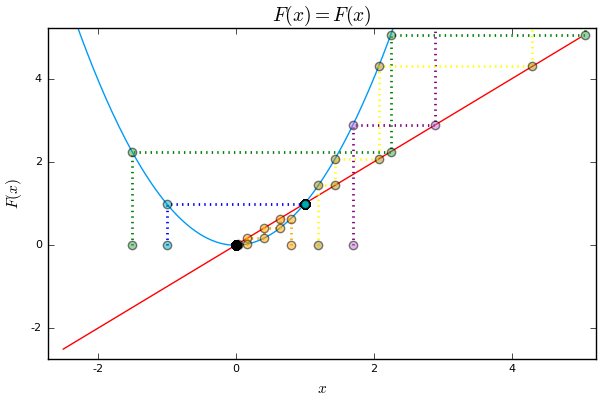

In [60]:
#Analizando F4
ranx3 = Float64[-2.5,5.0]
rany3 = Float64[-0.5,5.0]
Fmapeo_graph(F4, -1.5, ranx3, rany3)

x0,y0=Fmapeos(F4,1.7,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F4,1.2,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F4,-1.0,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F4,0.8,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(F4,0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Acá hay dos puntos fijos, `0.0` y `1.0`. Vemos cómo hay un alternado entre atracción y repulsión. Es importante notar que `-1.0` tiene una órbita eventualmente periódica, ya que a tan solo una iteración llega a `1.0` y se fija. Entonces, $x<-1$ diverge, $1>x>-1$ atractor a `0.0` y $x>1$ diverge.


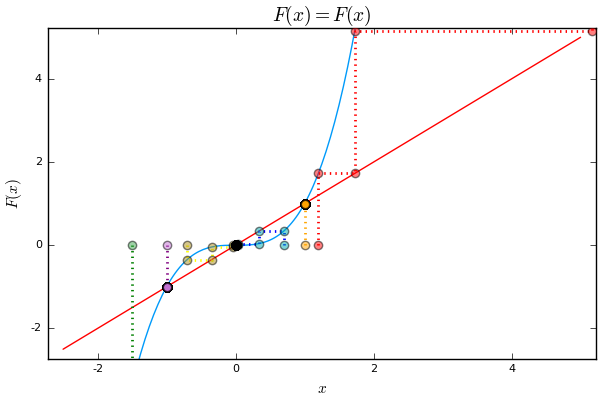

In [61]:
#Analizando F5
ranx3 = Float64[-2.5,5.0]
rany3 = Float64[-0.5,5.0]

Fmapeo_graph(F5, -1.5, ranx3, rany3)

x0,y0=Fmapeos(F5, -1.0,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F5, -0.7,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F5, 0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F5, 1.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(F5, 1.2,100)
plot!(x3, y3, 
line=(:red, :path, 2.0, :dot), marker=(:red,:point, 0.5))

x3,y3=Fmapeos(F5, 0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Para esta función, tenemos la misma distribución de puntos divergentes y atractores. Sin embargo, acá $-1$ sí es un punto fijo. También vemos cómo los puntos menores a $-1$ divergen hacia $-\inf$ y los puntos $[-1,0]$ se acercan a $0$ por la izquierda.


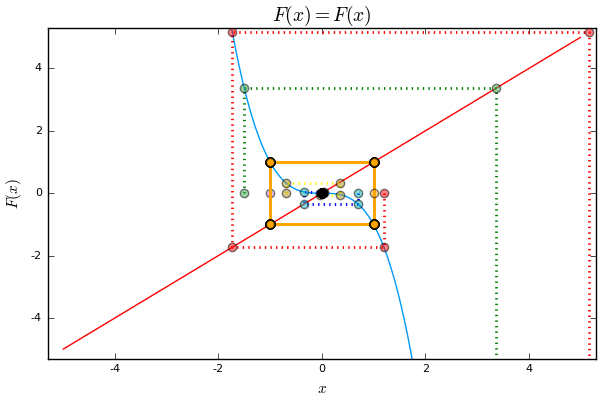

In [62]:
#Analizando F6
ranx4 = Float64[-5,5.0]


Fmapeo_graph(F6, -1.5, ranx4, ranx4)

x0,y0=Fmapeos(F6, -1.0,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F6, -0.7,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F6, 0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F6, 1.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(F6, 1.2,100)
plot!(x3, y3, 
line=(:red, :path, 2.0, :dot), marker=(:red,:point, 0.5))

x3,y3=Fmapeos(F6, 0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Similar a $F2(x)$, tenemos una órbita que "delimita" el comportamiento atractor del punto fijo 0. Fuera de dicha orbita las iteraciones divergen y dentro, convergen a 0.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

In [64]:
F7(x)=x
F8(x)=-x
F9(x)=x-x^2

F9 (generic function with 1 method)


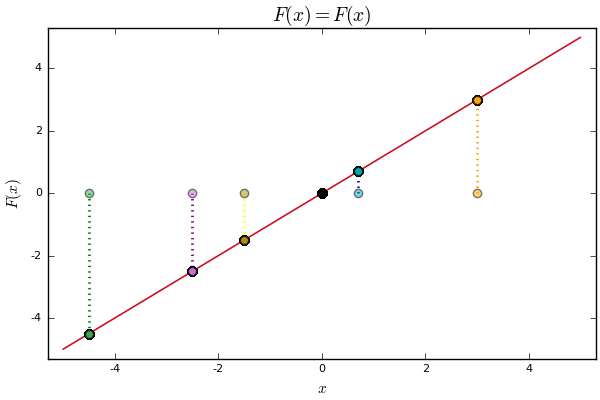

In [65]:
Fmapeo_graph(F7, -4.5, ranx4, ranx4)

x0,y0=Fmapeos(F7,-2.5,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F7,-1.5,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F7,0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F7,3.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(F7,0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

En este caso todo los puntos de la función son puntos fijos, ya que todo número cumple que x=x. Ya que todos los puntos son fijos, no hay atracción ni repulsión hacia 0.


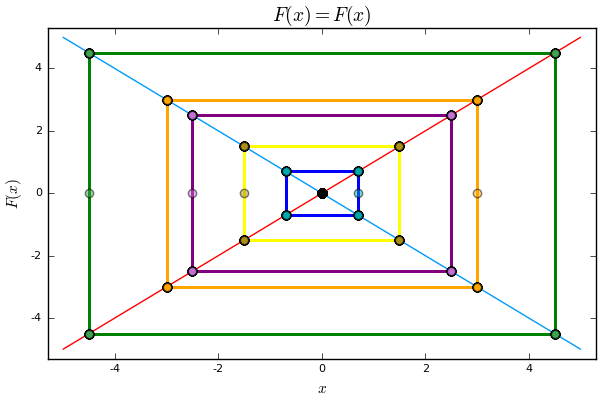

In [66]:
Fmapeo_graph(F8, -4.5, ranx4, ranx4)

x0,y0=Fmapeos(F8,-2.5,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F8,-1.5,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F8,0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F8,3.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(F8,0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Para esta función, todos los puntos de la recta formas órbitas de periodo 2. Vemos que esta función cumple la simetría con la identidad que vimos en $F_1(x)$. Similarmente, vemos cómo las órbitas están centradas en la raíz, a pesar de que las semillas no sean ataídas ni repulsadas.


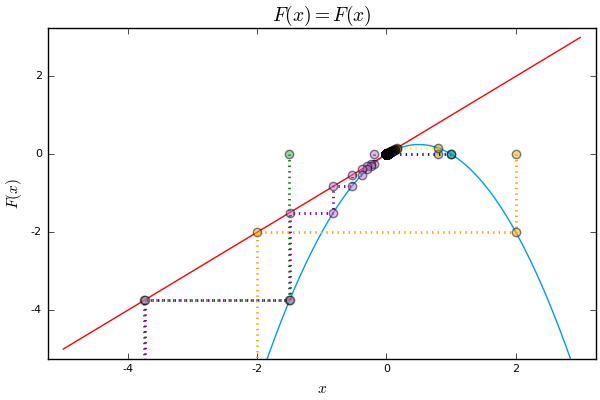

In [67]:
ranx5 = Float64[-5.0,3.0]
rany5 = Float64[-5.0,1.0]

Fmapeo_graph(F9, -1.5, ranx5, rany5)

x0,y0=Fmapeos(F9,-0.2,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(F9,0.8,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(F9,1.0,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(F9,2.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(F9,0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Finalmente, en esta función tenemos un pseudo punto fijo en $x=1$ que marca un intervalo convergente de semillas en $[0,1]$. Fuera de este intervalo, todas las semillas divergen.